In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sys; sys.path.append('..')
from tqdm import tqdm
from util.plot import plot_item_rank
%matplotlib inline

In [2]:
import pandas as pd
train_df = pd.read_csv("../data/movielens/train_rating.csv")
test_df = pd.read_csv("../data/movielens/test_rating.csv")

In [3]:
np.random.seed(1234)
#index = rating_df.index.values
#np.random.shuffle(index)
#index = index[:100000]
#rating_df = rating_df.iloc[index]

In [4]:
train_df["type"] = "train"
test_df["type"] = "test"
df = pd.concat([train_df, test_df])

In [5]:
data = df[["user_id","movie_id","rating","type"]].values

In [6]:
#data = rating_df[["user_id", "movie_id", "rating"]].values

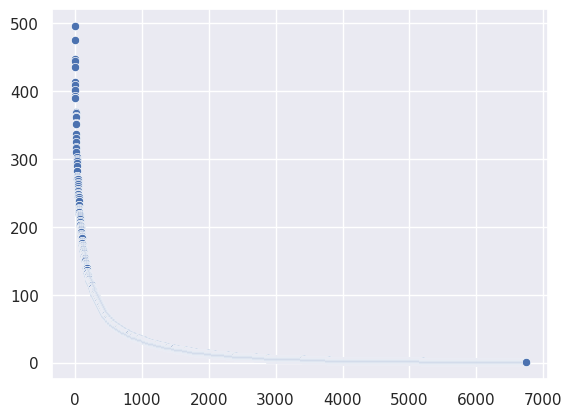

In [7]:
plot_item_rank(df)

In [8]:
num_users = np.unique(data[:,0]).size
num_items = np.unique(data[:,1]).size
print(f'ユーザー数: {num_users}, アイテム数: {num_items}, 評価数: {len(data)}, 密度: {len(data)/(num_users*num_items):.3f}')

ユーザー数: 1000, アイテム数: 6736, 評価数: 132830, 密度: 0.020


In [9]:
user_index = {} 
for index, user_id in enumerate(np.unique(data[:,0])):
    user_index[int(user_id)] = index

item_index = {}
for index, item_id in enumerate(np.unique(data[:,1])):
    item_index[int(item_id)] = index

for index, _data in enumerate(data):
    data[index, 0] = user_index[_data[0]]
    data[index, 1] = item_index[_data[1]]

In [10]:
from sklearn.model_selection import train_test_split

train = data[data[:,3] == "train"][:,:3]
test = data[data[:,3] == "test"][:,:3]

print(f"trainサイズ: {len(train)}, testサイズ: {len(test)}")
#train, test = train_test_split(data, test_size=0.3, random_state=1234)

trainサイズ: 127830, testサイズ: 5000


In [77]:
from src.MF import MF

model = MF(
    n_users=num_users,
    n_items=num_items,
    n_factors=2000,
    lr=3e-2,
    reg=0.2,
    n_epochs=10
)

train_loss, test_loss = model.fit(train, test)

100% 10/10 [00:31<00:00,  3.12s/it]


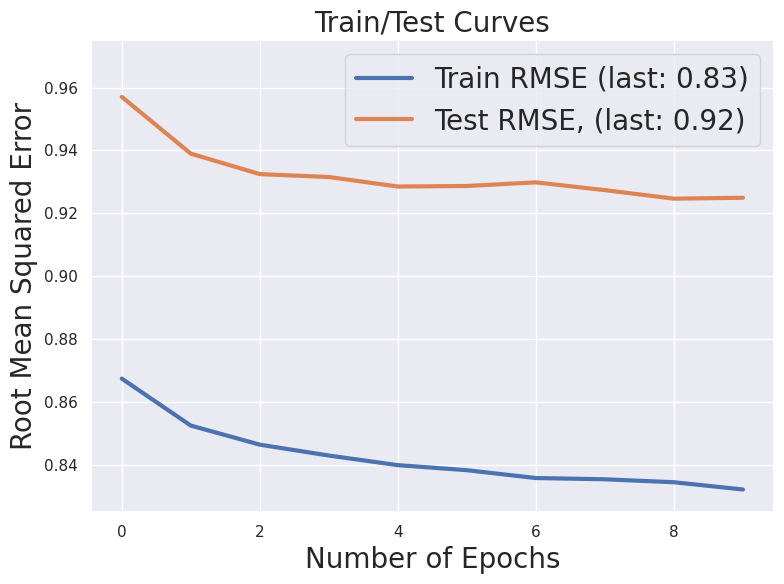

In [81]:
from util.plot import plot_train_curve, plot_heatmap, plot_rec_count
from util.recommend import generate_rec_list

plot_train_curve(
    train_loss, 
    test_loss,
    ylim_min=0.825,
    ylim_max=0.975
)

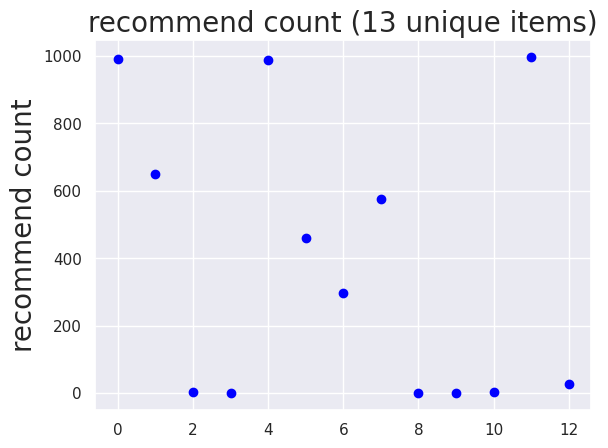

In [79]:
rec_list = generate_rec_list(data, model.matrix, top_k=5)
plot_rec_count(rec_list)

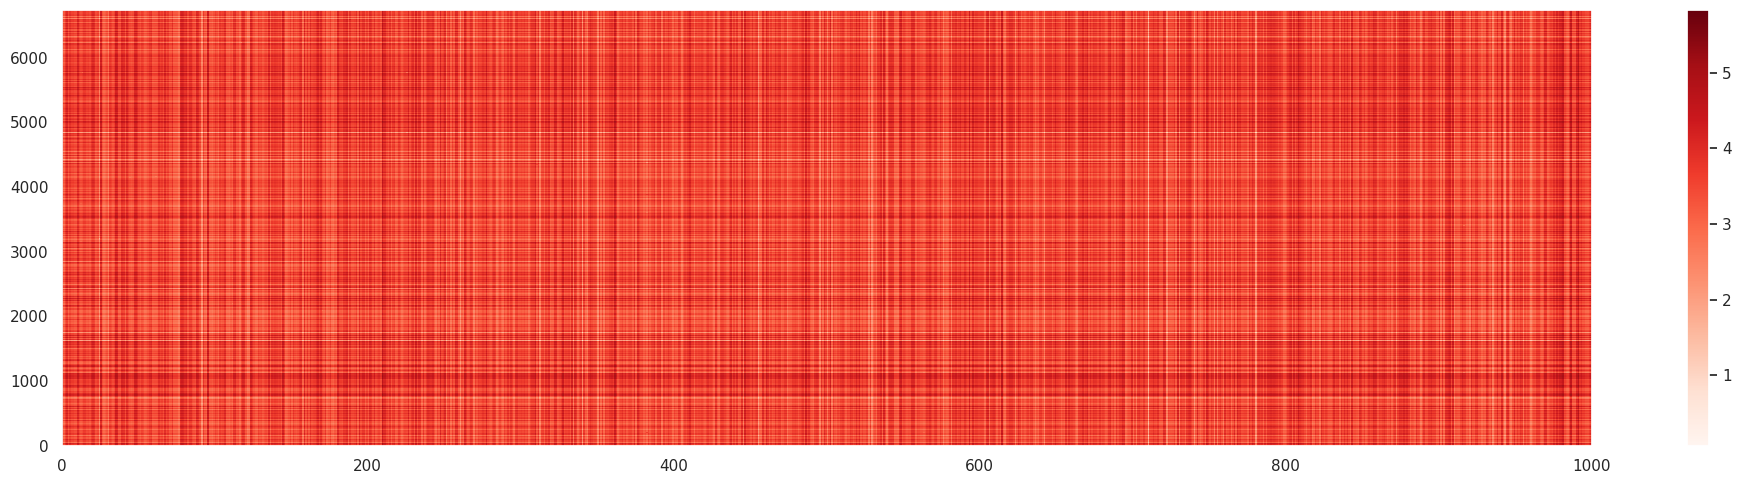

In [80]:
plot_heatmap(model.matrix.T)

In [96]:
from sklearn.utils import check_random_state

random = check_random_state(12345)
random.shuffle(train)

In [100]:
train[[0,1]]

array([[996, 543, 3.0],
       [762, 207, 4.5]], dtype=object)